# Trabajando con series temporales

Pandas se desarrolló con objetivo del modelado financiero, por lo que, como era de esperar, contiene un conjunto bastante extenso de herramientas para trabajar con fechas, horas y datos indexados por tiempo.
Los datos de fecha y hora vienen tienen más de una representación:

- **Marcas temporales** hacen referencia a momentos particulares en el tiempo (por ejemplo, July 4th, 2015 at 7:00am).
- **Intervalos de tiempo** y **periodos** hacen referencia a un período de tiempo entre dos puntos determinados; por ejemplo, el año 2015. Los *periods* generalmente hacen referencia a un caso especial de intervalos de tiempo en los que cada intervalo tiene una duración uniforme y no se superpone (por ejemplo, períodos de 24 horas que comprenden días).
- **Deltas temporales** o **duraciones** hacen referencia a un período de tiempo exacto (por ejemplo, una duración de 22.56 segundos).

En esta sección, veremos cómo trabajar con cada uno de estos tipos de datos de fecha/hora en Pandas.

Esto no será una guía completa de las herramientas de series de tiempo disponibles en Python o Pandas, sino mñas bien una descripción general de cómo podemos abordar el trabajo con series temporales.

Comenzaremos con las herramientas para lidiar con fechas y horas en Python, antes de pasar más específicamente a las herramientas proporcionadas por Pandas.

Después de enumerar algunos recursos más profundos, veremos algunos ejemplos breves de cómo trabajar con datos temporales en Pandas.

## Fechas y horas en Pandas

El mundo de Python tiene varias representaciones disponibles de fechas, horas, deltas e intervalos de tiempo.
Si bien las herramientas de series temporales proporcionadas por Pandas tienden a ser las más útiles para las aplicaciones de ciencia de datos, es útil ver su relación con otros paquetes utilizados en Python.

### Fechas y horas nativas de Python: ``datetime`` y ``dateutil``

Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo built-in ``datetime``.
Junto con el módulo de terceros ``dateutil``, podemos usarlos para realizar fácilmente una serie de funciones muy útiles con fechas y horas.
Por ejemplo, podemos crear manualmente una fecha usando el tipo ``datetime``:

In [26]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

O, usando el módulo ``dateutil``, puedes convertir a fecha desde strings con varios formatos:

In [4]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Pero puede inferir muchos más:

In [5]:
print(parser.parse("2015/10/12"))
print(parser.parse("2015-10-12"))
# Ojo, por defecto, en este formato interpreta mes-día-año
print(parser.parse("12-10-2015"))

2015-10-12 00:00:00
2015-10-12 00:00:00
2015-12-10 00:00:00


Incluso podría sacar el día de hoy, ahora mismo:

In [29]:
date = datetime.now()
date

datetime.datetime(2020, 12, 16, 22, 7, 42, 458980)

Una vez que tenemos el objeto ``datetime``, podemos hacer cosas como imprimir el día de la semana:

In [30]:
date.strftime('%A')

'Wednesday'

### EJERCICIO

Interpreta las siguientes fechas y obtén qué día de la semana fue o va a ser (algunas las tendrás que interpretar tú y otras directamente):
1. "2020-09-15"
2. "12th October, 1492"
3. 20 de Enero de 1999
4. 7 de Marzo de 2077
5. "1512/02/01"
6. "2021-05-22"

In [7]:
print(parser.parse("2020-09-15"))
print(parser.parse("12th October, 1492"))
print(parser.parse("1999-01-20"))
print(parser.parse("2077-03-07"))
print(parser.parse("1512/02/01"))
print(parser.parse("2021-05-22"))

2020-09-15 00:00:00
1492-10-12 00:00:00
1999-01-20 00:00:00
2077-03-07 00:00:00
1512-02-01 00:00:00
2021-05-22 00:00:00


En la última línea, hemos usado uno de los códigos de formato de cadena estándar para imprimir fechas (``"% A"``), sobre el cual podemos leer en la [sección de strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) de la [documentación de Python](https://docs.python.org/3/library/datetime.html).

La documentación de otras utilidades de fecha se puede encontrar en la [documentación en línea de dateutil](http://labix.org/python-dateutil).
Un paquete relacionado a tener en cuenta es [``pytz``](http://pytz.sourceforge.net/), que contiene herramientas para trabajar con zonas horarias.

Pero no solo podemos hacer esto, sino que también podemos sumar y restar deltas temporales. Para ello, nos ayudaremos de ``relativedelta``, al cual le pasaremos los días, meses, años... que queramos utilizar en nuestra operación temporal.

[Aquí](http://labix.org/python-dateutil#head-ba5ffd4df8111d1b83fc194b97ebecf837add454) puedes consultar más sobre este objeto. A continuación, algunos ejemplos:

In [24]:
from dateutil.relativedelta import relativedelta

# Restamos 8 días al 15 de enero de 2024:
nueva_fecha = datetime(year=2024, month=1, day=15) - relativedelta(days=8)
print(nueva_fecha)

# Restamos 13 meses al 20 de mayo de 1970:
nueva_fecha2 = datetime(year=1970, month=5, day=20) - relativedelta(months=13)
print(nueva_fecha2)

# Pero podemos juntar más cosas en una sola sentencia, y también funciona con horas:
# Restamos 1 año, 48 días y 53 minutos al 20 de mayo de 1970 a las 20:59:00:
nueva_fecha3 = datetime(year=1970, month=5, day=20, hour=20, minute=59, second=0) - relativedelta(years=1, days=48, minutes=53)
print(nueva_fecha3)


2024-01-07 00:00:00
1969-04-20 00:00:00
1969-04-02 20:06:00


### EJERCICIO

Utiliza las 4 primeras fechas del último ejercicio y calcula:
1. Resta 24 días
2. Suma 5 meses
3. Suma 2 días y resta 4 meses
4. Suma 1 año y 2 días

Finalmente, utiliza la fecha y hora actual para calcular:
1. Mes pasado
2. Año pasado
3. Hace 2 horas

In [73]:
print(parser.parse("2020-09-15") + relativedelta(days=24))
print(parser.parse("12th October, 1492") + relativedelta(months=5))
print(parser.parse("1999-01-20") + relativedelta(days=2, months=-4))
print(parser.parse("2077-03-07") + relativedelta(years=1, days=2))

2020-10-09 00:00:00
1493-03-12 00:00:00
1998-09-22 00:00:00
2078-03-09 00:00:00


In [74]:
print(datetime.now() - relativedelta(months=1))
print(datetime.now() - relativedelta(years=1))
print(datetime.now() - relativedelta(hours=2))

2020-11-16 22:33:31.641439
2019-12-16 22:33:31.641439
2020-12-16 20:33:31.641439


Realmente, lo que hace ``relativedelta`` es crear un interfaz de manejo más sencillo sobre datetime (con el que podríamos trabajar directamente importando ``timedelta`` de ``datetime``), ya que, por defecto, datetime trabaja con la diferencia de fechas con días y segundos. Con ``relativedelta`` podemos utilizar meses y años para realizar operaciones con fechas.

Por ello, si realizamos operaciones con funciones, obtenemos un objeto ``datetime.timedelta``:

In [75]:
a = datetime.now()
b = datetime.now() - relativedelta(months=7, days=7, hours=7)

b - a

datetime.timedelta(days=-222, seconds=61200)

Por ello, mejor que trabajemos con ``relativedelta``, sin embargo, también podríamos trabajar con diferencias de fechas directamente, tal como hemos visto en el paso anterior. Por ejemplo, si queremos saber cuánto tiempo llevamos de clase:

In [76]:
comienzo = datetime(year=2020, month=12, day=17, hour=18, minute=5)
actual = datetime.now()

tiempo_de_clase = actual - comienzo
print(tiempo_de_clase)

-1 day, 4:28:32.426621


O podemos jugar con intervalos de tiempo en base a las fechas. Por ejemplo, si sabemos los días de comienzo y final de un evento que ha sucedido el año pasado, y queremos saber hasta cuándo durará el año que viene, suponiendo que lo han movido por culpa de la pandemia, podríamos hacer lo siguiente:

In [77]:
comienzo_evento_pasado = datetime(year=2019, month=5, day=1)
fin_evento_pasado = datetime(year=2019, month=6, day=12)

comienzo_evento_next = datetime(year=2021, month=7, day=29)

fin_evento_next = comienzo_evento_next + (fin_evento_pasado - comienzo_evento_pasado)

print(fin_evento_next)

2021-09-09 00:00:00


El poder de ``datetime`` y ``dateutil`` radica en su flexibilidad y sintaxis sencilla: podemos usar estos objetos y sus métodos integrados para realizar fácilmente casi cualquier operación que nos pueda interesar.
Donde fallan es cuando queremos trabajar con grandes conjuntos de fechas y horas:
Así como las listas de variables numéricas de Python son subóptimas en comparación con los arrays numéricos de NumPy, las listas de objetos de fecha y hora de Python son subóptimas en comparación con los arrays tipados de fechas.

### Arrays tipados de fechas: ``datetime64`` de Numpy

Las debilidades del formato de fecha y hora de Python inspiraron al equipo de NumPy a agregar un conjunto de tipos de datos de series temporales nativos a su propia librería.
El dtype ``datetime64`` codifica las fechas como enteros de 64 bits y, por lo tanto, permite que losa rrays de fechas se representen de manera muy compacta.
El ``datetime64`` requiere un formato de entrada muy específico:

In [78]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Sin embargo, una vez que tengamos esta fecha formateada, podemos realizar rápidamente operaciones vectorizadas con ella:

In [79]:
date + np.arange(12) # suma días

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Gracias al tipado uniforme en los arrays de NumPy ``datetime64``, este tipo de operación se puede realizar mucho más rápido que si estuviéramos trabajando directamente con los objetos ``datetime`` de Python, especialmente a medida que los arrays se hacen más grandes.

Un detalle de los objetos ``datetime64`` y ``timedelta64`` es que están construidos en una unidad de tiempo fundamental.
Dado que el objeto ``datetime64`` está limitado a una precisión de 64 bits, el rango de tiempos codificables es $2^{64}$ veces esta unidad fundamental.
En otras palabras, ``datetime64`` impone un trade-off entre la resolución de tiempo y el período de tiempo máximo.

Por ejemplo, si deseas una resolución de tiempo de un nanosegundo, solo tiene suficiente información para codificar un rango de $2^{64}$ nanosegundos, que es algo menos de 600 años.
NumPy inferirá la unidad deseada a partir de la entrada; por ejemplo, aquí hay una fecha a nivel de día:

In [80]:
np.datetime64('2015-07-04') # guarda hasta el día

numpy.datetime64('2015-07-04')

Y aquí otra a nivel de minutos:

In [81]:
np.datetime64('2015-07-04 12:00') # guarda hasta los minutos

numpy.datetime64('2015-07-04T12:00')

Observa que la zona horaria se establece automáticamente como la hora local del ordenador que ejecuta el código.
Puedes forzar cualquier unidad fundamental utilizando uno de los muchos códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos:

In [82]:
np.datetime64('2015-07-04 12:59:59.50', 'ns') # fuerzo que se guarde en nanosegundos

# la precisión de la variable datetime64 depende de hasta dónde se guarde el detalle de la fecha
# a más detalle, menos periodo de tiempo abarcado

numpy.datetime64('2015-07-04T12:59:59.500000000')

La siguiente tabla, extraída de la [docuemntación de datetime64 de NumPy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), enumera los códigos de formato disponibles junto con los períodos de tiempo relativos y absolutos que puede codificar:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

Para los tipos de datos que vemos en el mundo real, el valor predeterminado es ``datetime64[ns]``, ya que puede codificar un rango útil de fechas con una precisión adecuada.

Finalmente, notaremos que si bien el tipo de datos ``datetime64`` aborda algunas de las deficiencias del tipo incorporado de Python ``datetime``, carece de muchos de los métodos y funciones convenientes proporcionados por ``datetime`` y ``dateutil``.
Puede encontrar más información en la [documentación del datetime64 de NumPy](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### EJERCICIO

Interpreta las siguientes fechas como ``datetime64`` según el periodo relativo que indique o que mejor se adapte:
1. "2020-09-15 00:00"
2. 12th October, 1492 (al nanosegundo)
3. 20 de Enero de 1999 a las 15:24:10
4. 7 de Marzo de 2077 01:01:01.00000001
5. "1512/02/01" a las 23:00
6. "1512/02/01 23:30:10.00000034"
7. "1512/02/01 23:30:10.00000034" como segundos
8. "2021-05-22" como microsegundos


¿Has observado algo raro? ¿Entiendes por qué pasa?

In [90]:
print(np.datetime64("2020-09-15 00:00"))
print(np.datetime64("1492-10-12", 'ns'))
print(np.datetime64("1999-01-22 15:24:10"))
print(np.datetime64("2077-03-07 01:01:01.00000001"))
print(np.datetime64("1512-02-01 23:00"))
print(np.datetime64("1512-02-01 23:30:10.00000034"))
print(np.datetime64("1512-02-01 23:30:10.00000034", "s"))
print(np.datetime64("2021-05-22", "us"))


2020-09-15T00:00
2077-05-01T23:34:33.709551616
1999-01-22T15:24:10
2077-03-07T01:01:01.000000010
1512-02-01T23:00
2096-08-20T23:04:43.709551956
1512-02-01T23:30:10
2021-05-22T00:00:00.000000


### Fechas y horas en Pandas: lo mejor de ambos mundos

Pandas se basa en todas las herramientas que acabamos de comentar para proporcionar un objeto ``Timestamp``, que combina la facilidad de uso de ``datetime`` y ``dateutil`` con el almacenamiento eficiente y la interfaz vectorizada de ``numpy.datetime64``.

A partir de un grupo de estos objetos de ``Timestamp``, Pandas puede construir un ``DatetimeIndex``, que se puede usar para indexar datos en un ``Series`` o ``DataFrame``; veremos muchos ejemplos de esto a continuación.

Por ejemplo, podemos usar las herramientas de Pandas para repetir la demostración de arriba.
Podemos analizar una fecha de cadena con formato flexible y usar códigos de formato para generar el día de la semana:

In [91]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [92]:
date.strftime('%A')

'Saturday'

Si estamos con ``Timestamp`` y no con ``DatetimeIndex`` (es decir, que estamos con una fecha concreta y no con conjuntos de fechas), podemos utilizar el relativedelta:

In [142]:
date - relativedelta(months=10)

Timestamp('2014-09-04 00:00:00')

Con ello, podríamos hacer operaciones de conjuntos de datos basándonos en algo parecido a lo que hacíamos con las listas. Sin embargo, existe una forma de hacer operacinoes temporales al estilo de NumPy, y es con la función ``pd.to_timedelta``, tal como se ve a continuación:

In [121]:
date + pd.to_timedelta(np.arange(12), 'd') # suma 12 días

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

También podemos utilizar diferentes frecuencias, no solo diario, tal como indica esta tabla:

| Code   | Description         |
|--------|---------------------|
| ``d``  | Calendar day        |
| ``w``  | Weekly              |
| ``h``  | Hours               |
| ``T``  | Minutes             |
| ``s``  | Seconds             |
| ``l``  | Milliseonds         |
| ``u``  | Microseconds        |
| ``n``  | nanoseconds         |

### EJERCICIO


1. 
Ayudándote de la tabla anterior, crea una función que tome como parámetro:
 - fecha: un string con el formato de fecha "YYYY-MM-DD" (año-mes-día)
 - valor: un entero con el que se hará una operación sobre la fecha recibida
 - unidad: un string que valdrá cualquiera de los siguietnes strings: "microsegundos", "milisegundos", "segundos", "minutos", "horas", "días" o "semanas"
 - operación": string que sea "+" o "-"
 
La función deberá recoger un string con formato de fecha que debrá convertirse a tipo ``Timestamp``, tal como hemos visto con la función de Pandas. Después, se le sumará o restará "valor" con frecuencia "unidad", en función del parámetro "operación". Habrá que traducir el campo "unidad" a frecuencias entendibles por la función de Pandas.

2. 
Modifica la función para aceptar una lista en el parámetro "valor", y que devuelva el DatetimeIndex correspondiente de hacer la operación con ese conjunto de fechas. Si quieres, puedes cambiar el nombre del parámetro a "valores" en lugar de "valor".


In [134]:
date + pd.to_timedelta(np.arange(12), 's')

DatetimeIndex(['2015-07-04 00:00:00', '2015-07-04 00:00:01',
               '2015-07-04 00:00:02', '2015-07-04 00:00:03',
               '2015-07-04 00:00:04', '2015-07-04 00:00:05',
               '2015-07-04 00:00:06', '2015-07-04 00:00:07',
               '2015-07-04 00:00:08', '2015-07-04 00:00:09',
               '2015-07-04 00:00:10', '2015-07-04 00:00:11'],
              dtype='datetime64[ns]', freq=None)

In [139]:
def tiempea(fecha, valores=[0], unidad='segundos', operacion='+'):
    map_unidades = {"semanas": 'w',
                    "dias": 'd',
                   "horas": 'h',
                   "minutos": 't',
                   "segundos": 's',
                   "milisegundos": 'l',
                   "microsegundos": 'u',
                   "nanosegundos": 'n'}
    
    dt = pd.to_datetime(fecha)
    
    if operacion == '+':
        return dt + pd.to_timedelta(valores, map_unidades[unidad])
    elif operacion == '-':
        return dt - pd.to_timedelta(valores, map_unidades[unidad])
    else:
        print("Operación no definida")
        return False
    

tiempea("2020-12-20", valores=[10, 80, 2, 55], unidad='semanas', operacion='-')
    

DatetimeIndex(['2020-10-11', '2019-06-09', '2020-12-06', '2019-12-01'], dtype='datetime64[ns]', freq=None)

### EJERCICIO

Haz las siguientes operaciones y devuelve el día de la semana que fue esa fecha:

1. "2020-09-15" + 15 días
2. 20 de Enero de 1999 a las 15:24:10 + 2 minutos
3. 7 de Marzo de 2077 01:01:01.00000001 - 1 año
4. "1512/02/01" a las 23:00 + 5 nanosegundos
5. "1984-10-01" - 370 semanas


In [141]:
datetime.strftime((date + pd.to_timedelta(np.arange(3), 'm'))[-1], "%A")

'Saturday'

En la siguiente sección, veremos más de cerca la manipulación de datos de series de tiempo con las herramientas proporcionadas por Pandas.

## Series temporales de Pandas: Indexando por tiempo

Donde las herramientas de series temporales de Pandas se vuelven realmente útiles es cuando comenzamos a indexar datos por marcas temporales.
Por ejemplo, podemos construir un objeto ``Series`` que tenga datos indexados por tiempo del siguiente modo:

In [143]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Ahora que tenemos estos datos en una ``Series``, podemos hacer uso de cualquiera de los patrones de indexación de las ``Series`` que discutimos en las secciones anteriores, pasando valores que se puedan convertir en fechas:

In [144]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Hay operaciones adicionales de indexación especiales exclusivas de las fechas, como pasar un año para obtener una porción de todos los datos de ese año:

In [145]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Más adelante, veremos ejemplos adicionales de la conveniencia de las fechas como índices.
Pero antes, es interesante ver las estructuras de datos de series de tiempo disponibles.

## Estructuras de datos de series temporales en Pandas

A continuación, presentaremos las estructuras de datos fundamentales de Pandas para trabajar con datos de series temporales:

- Para *marcas temporales*, Pandas proporciona el tipo ``Timestamp``. Como se mencionó anteriormente, es esencialmente un reemplazo del ``datetime`` nativo de Python, pero se basa en el tipo de datos ``numpy.datetime64`` más eficiente. La estructura de índice asociada es `` DatetimeIndex ''.
- Para *periodos de tiempo*, Pandas proporciona el tipo ``Period``. Esto codifica un intervalo de frecuencia fija basado en ``numpy.datetime64``. La estructura de índice asociada es ``PeriodIndex``.
- Para *deltas de tiempo* o *duraciones*, Pandas proporciona el tipo ``Timedelta``. ``Timedelta`` es un reemplazo más eficiente para el tipo nativo de Python ``datetime.timedelta`` y se basa en ``numpy.timedelta64``. La estructura de índice asociada es ``TimedeltaIndex``.

Lo más importante de estos objetos de fecha/hora son los objetos ``Timestamp`` y ``DatetimeIndex``.
Si bien estos objetos se pueden invocar directamente instanciándolos desde su clase, es más común usar la función ``pd.to_datetime()``, que puede analizar una amplia variedad de formatos e inferirlos automáticamente.

Pasar una sola fecha a ``pd.to_datetime()`` devuelve un ``Timestamp``; pasar una serie de fechas por defecto devuelve un ``DatetimeIndex``:

In [152]:
from datetime import datetime 
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

# año mes día

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Cualquier ``DatetimeIndex`` puede ser convertido a ``PeriodIndex`` con la función ``to_period()`` añadiendo el código de la frecuencia. En este caso, usaremos ``'D'`` para indicar frecuencia diaria:

In [153]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Fíjate que, si tenemos fechas diarias, utilizar una frecuencia no acorde con su distribución, como puede ser mensual, produce el mismo resultado si repetimos fechas del mismo mes:

In [155]:
dates.to_period('M')

PeriodIndex(['2015-07', '2015-07', '2015-07', '2015-07', '2015-07'], dtype='period[M]', freq='M')

Los ``TimedeltaIndex`` aparecen, por ejemplo, cuando se restan dos fechas:

In [156]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### EJERCICIOS

Ahora que ya hemos aprendido un poco más de esto, vamos a hacer ejercicios que realmente sirvan para algo:
1. Lee el dataset de reseñas de yelp! (../../data/yelp_academic_dataset_review.csv)
2. Quédate solo con las columnas "stars" y "date"
3. Convierte la columna "date" en formato fecha
4. Quédate con 1 registro por día y haz la media de stars
5. ¿Cuál es la mayor diferencia de días sin registros?
6. Vuelve al df original y crea un DatetimeIndex a partir de la columna 'date'. (Puede que no valga directamente con usar el ``Series``, sino que haya que tener los datos en cierto tipo de variable, mira el ejemplo)
7. Créate, a partir de esa variable DatetimeIndex, una nueva variable PeriodIndex con frecuencia mensual, y asígnala a una nueva columna "date_M"
8. Agrupa por esta variable y obtén el máximo, el mínimo y el total de "stars" por mes. ¿Qué mes ha sido el que más reseñas ha recibido?

In [168]:
df = pd.read_csv("../../data/yelp_academic_dataset_review.csv")[['stars', 'date']]
df['date'] = pd.to_datetime(df['date'])
df = df.groupby('date').agg({'stars': 'mean'})
df = df.sort_index(ascending = True)

In [169]:
diff = df.index[0] - df.index[0]
diffs = []
for i in range(1, len(df.index)):
    aux_diff = df.index[i] - df.index[i-1]
    if aux_diff > diff:
        diff = aux_diff
        diffs = [df.index[i-1], df.index[i]]
diff

Timedelta('159 days 00:00:00')

In [170]:
# Otra opción para calcular las diferencias:
fechas_1 = df.index[:-1]
fechas_2 = df.index[1:]

max_diff = max(fechas_2 - fechas_1)
max_diff

Timedelta('159 days 00:00:00')

In [171]:
df = pd.read_csv("../../data/yelp_academic_dataset_review.csv")[['stars', 'date']]
dd = pd.to_datetime(df['date'].values)
df['date_M'] = dd.to_period("M")
df_m = df.groupby(['date_M']).agg({'stars': ['max', 'min', 'count']})

In [175]:
df_m.sort_values(by=[('stars', 'count')], ascending=False).index[0]

Period('2012-01', 'M')

### Secuencias temporales: ``pd.date_range()``

Para crer secuencias temporales, existen otros métodos más convenientes, para los que Pandas ofrece las siguientes funciones: ``pd.date_range()`` para marcas de tiempo, ``pd.period_range ()`` para períodos y ``pd.timedelta_range()`` para deltas de tiempo.

Hemos visto que tanto ``range()`` de Python como ``np.arange()`` de NumPy generan una secuencia a partirde un punto de inicio, un punto final y un tamaño de paso (opcional).

De manera similar, ``pd.date_range()`` acepta una fecha de inicio, una fecha de final y un código de frecuencia (opcional) para crear una secuencia regular de fechas.
Por defecto, la frecuencia es de un día:

In [176]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternativamente, el rango de fechas se puede especificar con un punto de inicio y un número de períodos, en lugar de un punto final:

In [178]:
pd.date_range('2015-07-03', periods=8) # 8 días

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

El espaciado se puede modificar alterando el argumento ``freq``, que por defecto es ``D`` (diario).
Por ejemplo, si queremos crearnos un rango de marcas de tiempo por hora:

In [179]:
pd.date_range('2015-07-03', periods=8, freq='H') # 8 horas

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Para crear secuencias regulares con valores ``Period`` o ``Timedelta``, podemos utilizar las funciones ``pd.period_range()`` y ``pd.timedelta_range()``, como se muestra en los siguientes ejemplos:

In [181]:
# Variando periodos de manera mensual:
pd.period_range('2015-07', periods=8, freq='M') # 8 meses, de tipo periodo

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of durations increasing by an hour:

In [182]:
# Variando timedeltas de manera horaria:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Todos estos métodos requieren una comprensión de los códigos de frecuencia de Pandas, que resumiremos en la siguiente sección.

## Frecuencias y Offsets

Los conceptos de frecuencia y offset (temporal) son básicos para entender estas herramientas de series de tiempo de Pandas que estamos viendo.

Así como hemos visto los códigos ``D`` (día) y ``H`` (hora), podemos usar dichos códigos para especificar cualquier espaciado de frecuencia deseado.
La siguiente tabla resume los principales códigos disponibles:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [189]:
# Variando periodos:
pd.period_range('2015-07-01', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [211]:
# Variando marcas de tiempo:
pd.date_range("2020-1", periods=250, freq='BQ')

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30',
               ...
               '2080-03-29', '2080-06-28', '2080-09-30', '2080-12-31',
               '2081-03-31', '2081-06-30', '2081-09-30', '2081-12-31',
               '2082-03-31', '2082-06-30'],
              dtype='datetime64[ns]', length=250, freq='BQ-DEC')

Las frecuencias mensuales, trimestrales y anuales se marcan todas al final del período especificado.
Al agregar el sufijo ``S`` a cualquiera de estos, hará que se devuelva la primera fecha de cada uno de ellos:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

In [216]:
# Sacando el primer día laborable del año a lo largo de los próximos 20 años:
pd.date_range("2020-1", periods=20, freq='BAS')

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-03', '2023-01-02',
               '2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-03', '2029-01-01', '2030-01-01', '2031-01-01',
               '2032-01-01', '2033-01-03', '2034-01-02', '2035-01-01',
               '2036-01-01', '2037-01-01', '2038-01-01', '2039-01-03'],
              dtype='datetime64[ns]', freq='BAS-JAN')

Además, podemos cambiar el mes utilizado para marcar cualquier código trimestral o anual agregando un código de mes de tres letras como sufijo:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

Del mismo modo, el día de la semana que se utiliza de referencia se puede modificar agregando un código de día de la semana de tres letras:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

Además de esto, los códigos se pueden combinar con números para especificar otras frecuencias.
Por ejemplo, para una frecuencia de 2 horas 30 minutos, podemos combinar los códigos de hora (``H``) y minutos (``T``) de la siguiente manera:

In [222]:
pd.timedelta_range(0, periods=9, freq="2H30T") # tengo 9 timedelta separados 2H30T

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Todos estos códigos hacen referencia a instancias específicas de offsets de series temporales de Pandas, que se pueden encontrar en el módulo ``pd.tseries.offsets``.

Por ejemplo, podemos crear un offset de día laborable directamente de la siguiente manera:

In [224]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay()) # me devuelve 5 business days seguidos

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

Si quieres profundizar sobre las frecuencias y los offsets, puedes acceder a la documentación de Pandas en la sección [DateOffset objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

## Remuestreo, desplazamiento y ventaneo

La capacidad de utilizar fechas y horas como índices para organizar y acceder a los datos de forma intuitiva es una pieza importante de las herramientas de series temporales de Pandas.
Los beneficios de los datos indexados en general (alineación automática durante las operaciones, slicing y acceso intuitivo de datos, etc.) siguen aplicando, y Pandas proporciona varias operaciones adicionales específicas de series de tiempo para trabajar con ellos.


Echaremos un vistazo a algunos de ellos aquí, usando algunos datos de precios de acciones, por ejemplo.
Debido a que Pandas se desarrolló principalmente en un contexto financiero, incluye algunas herramientas muy específicas para datos financieros.
Por ejemplo, el paquete adjunto ``pandas-datareader`` (instalable a través de `` conda install pandas-datareader ``), sabe cómo importar datos financieros de varias fuentes disponibles, incluidas Yahoo Finance, Google Finance y otras.
Aquí cargaremos el historial de precios de cierre de Google:

In [226]:
import pandas as pd 

goog = pd.read_csv('GOOG.csv')
goog.info()
goog['Date'] =  pd.to_datetime(goog['Date'])

goog.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [227]:
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


Para simplificar, usaremos solo el precio de cierre:

In [228]:
goog = goog['Close']
goog

Date
2010-01-04     312.204773
2010-01-05     310.829926
2010-01-06     302.994293
2010-01-07     295.940735
2010-01-08     299.885956
                 ...     
2019-12-27    1351.890015
2019-12-30    1336.140015
2019-12-31    1337.020020
2020-01-02    1367.369995
2020-01-03    1360.660034
Name: Close, Length: 2518, dtype: float64

Podemos visualizar esto usando el método ``plot()``, para lo que teníamos que importar y realizar las configuraciones previas de Matplotlib:

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt

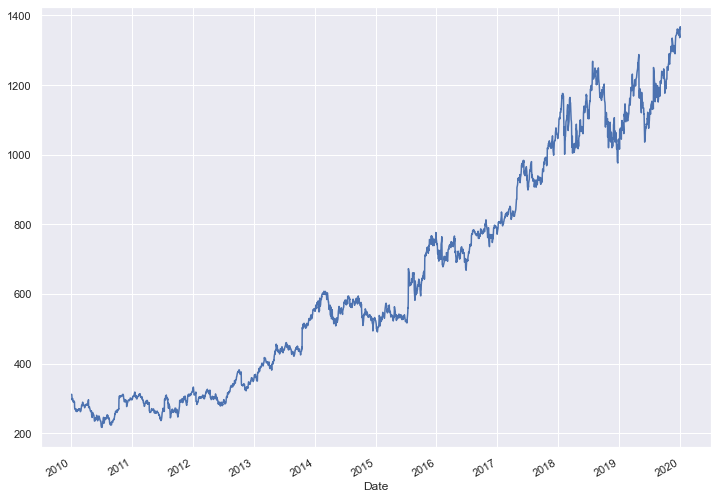

In [237]:
goog.plot(figsize=(12,9));

### Remuestreo y conversión de frecuencias

Una necesidad común para las series de datos temporales es el remuestreo a una frecuencia mayor o menor.
Esto se puede hacer usando el método ``resample()`` o el método ``asfreq()``, que es más simple.
La principal diferencia entre los dos es que ``resample()`` es fundamentalmente una *agregación de datos*, mientras que ``asfreq()`` es una *selección de datos*.

Esto lo veremos mejor con un ejemplo, así que echando un vistazo al precio de cierre de Google, será interesante comparar lo que devuelven los dos cuando bajamos la muestra de los datos con ambos métodos.

En este caso, vamos a muestrear los datos al final del año comercial:

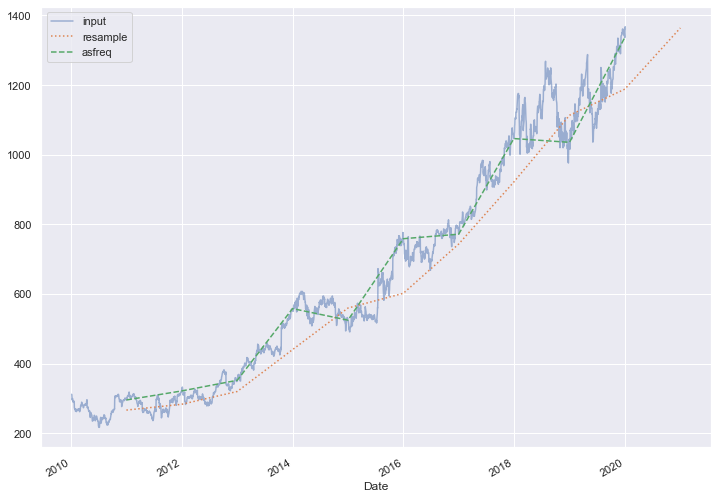

In [245]:
goog.plot(alpha=0.5, style='-',figsize=(12,9))
goog.resample('BA').mean().plot(style=':') # con una función de agregación, la media, BA es final de año
goog.asfreq('BA').plot(style='--'); # nos devolverá los valores de los puntos de fin de año (por lo que perderemos la info del resto de días)
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [246]:
goog.resample('BA').mean()

Date
2010-12-31     266.811472
2011-12-30     283.424738
2012-12-31     320.208021
2013-12-31     440.470378
2014-12-31     559.803290
2015-12-31     602.005681
2016-12-30     743.486707
2017-12-29     921.780837
2018-12-31    1113.225134
2019-12-31    1188.393057
2020-12-31    1364.015015
Freq: BA-DEC, Name: Close, dtype: float64

In [247]:
goog.asfreq('BA')

Date
2010-12-31     295.875977
2011-12-30     321.744019
2012-12-31     352.369232
2013-12-31     558.262512
2014-12-31     524.958740
2015-12-31     758.880005
2016-12-30     771.820007
2017-12-29    1046.400024
2018-12-31    1035.609985
2019-12-31    1337.020020
Freq: BA-DEC, Name: Close, dtype: float64

Fíjate que, en cada punto, ``resample`` devuelve la media del año completo, mientras que ``asfreq`` devuelve el valor al final del año (perdiendo info del resto de días del año).

Para hacer un muestreo a órdenes superiores, ``resample()`` y ``asfreq()`` son prácticamente equivalentes, aunque ``resample`` tiene muchas más opciones disponibles.

En este caso, el valor predeterminado para ambos métodos es dejar vacíos los puntos muestreados hacia arriba, es decir, rellenados con valores NA.
Al igual que con la función ``pd.fillna()``, ``asfreq()`` acepta un argumento de ``método`` para especificar cómo se imputan los valores.

Ahora, vamos a volver a muestrear los datos de los días hábiles originales con una frecuencia diaria (es decir, incluidos los fines de semana):

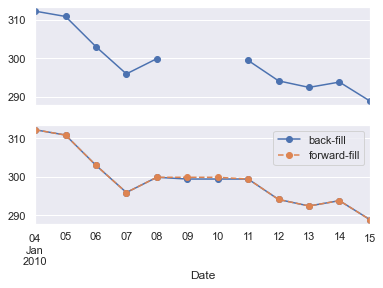

In [251]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10] # 10 primeros elementos de la serie

data.asfreq('D').plot(ax=ax[0], marker='o') # primer eje, con escala diaria, no sale el fin de semana

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# ffill: rellenamos hacia adelante los nulos (es decir, con el valor que había antes del nulo), backfill / bfill: rellenamos hacia atrás (valor siguiente)

La gráfica de arriba representa los datos predeterminados: los días no hábiles se dejan como valores NA y no aparecen en el gráfico.
La gráfica inferior muestra las diferencias entre las dos estrategias para llenar los nulos: hacia adelante (ffill) y llenado hacia atrás (bfill).

### EJERCICIOS

### 1.
Lee el fichero "daily-minimum-temperatures.csv" y remuestréalo para quedarte con los máximos de temperaturas por mes. Almacena este nuevo DataFrame resultante en una variable llamada ``df_temp``.

Asegúrate de tener el campo temporal como índice antes de hacer cosas.

In [262]:
df = pd.read_csv("daily-minimum-temperatures.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

df_temp = df.resample("M").mean()
df_temp

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


### 2.

Ahora, remuestrea el DataFrame de la variable ``df_temp`` de nuevo como si fuera diario y rellena los nulos con el método que creas más conveniente:

In [266]:
df_temp.asfreq('D', method='bfill')

,Temp
Date,
1981-01-31,17.712903
1981-02-01,17.678571
1981-02-02,17.678571
1981-02-03,17.678571
1981-02-04,17.678571
...,...
1990-12-27,14.367742
1990-12-28,14.367742
1990-12-29,14.367742


### Desplazamentos de tiempo

Otra operación específica bastante común con las series temporales es el desplazamiento de datos en el tiempo.
Pandas tiene dos métodos estrechamente relacionados para ello: ``shift()`` y ``tshift()``

En resumen, la diferencia entre ellos es que ``shift()`` *cambia los datos*, mientras que ``tshift()`` *cambia el índice*.
En ambos casos, el cambio se especifica en múltiplos de la frecuencia.

A continuación, tenemos un ejemplo de ``shift()`` y ``tshift()`` con 900 días: 

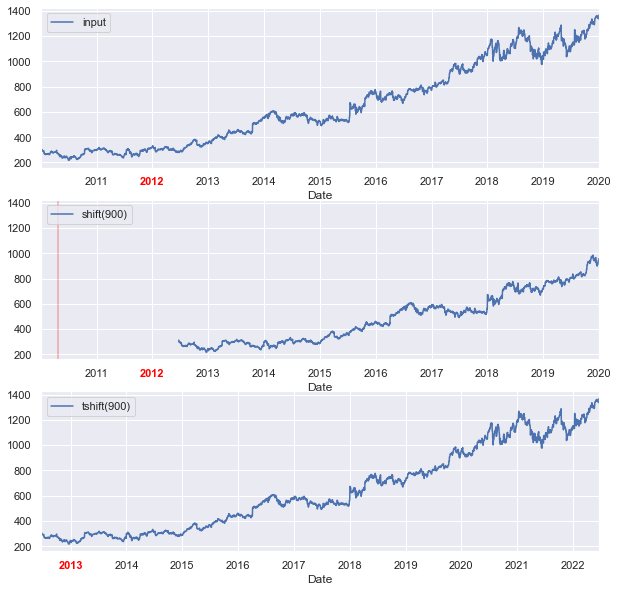

In [253]:
fig, ax = plt.subplots(3, sharey=True, figsize=(10, 10))

# apply a frequency to the data
goog = goog.asfreq('D', method='pad') # pad es relleno

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Como puedes observar, ``shift(900)`` mueve los datos 900 días, eliminando parte del final del gráfico (y dejando los valores NA en el otro extremo), mientras que ``tshift(900)`` desplaza los valores del índice en 900 días, es decir, desplazamos todo y no perdemos información.

Un contexto común para este tipo de desplazamiento es calcular las diferencias a lo largo del tiempo. Por ejemplo, usamos valores desplazados para calcular el retorno de la inversión de un año para las acciones de Google a lo largo del curso del dataset:

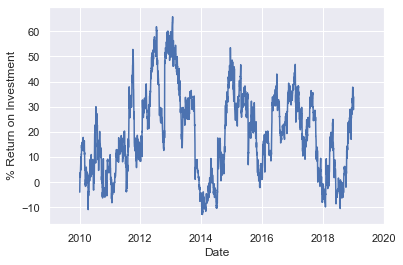

In [267]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

Esto nos permite ver la tendencia general de las acciones de Google: hasta ahora, los momentos más rentables para invertir en Google han sido (como era de esperar, en retrospectiva) poco después de su salida a bolsa y en medio de la recesión de 2009.

### Ventanas temporales

Las estadísticas temporales son un tercer tipo de operación específica de series temporales implementada por Pandas.
Esto se puede lograr mediante el atributo ``rolling()`` de los objetos ``Series`` y ``DataFrame``, que devuelve una vista similar a la que vimos con la operación ``groupby``.
Esta vista pone a disposición una serie de operaciones de agregación de forma predeterminada.

Por ejemplo, podríamos calcular la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

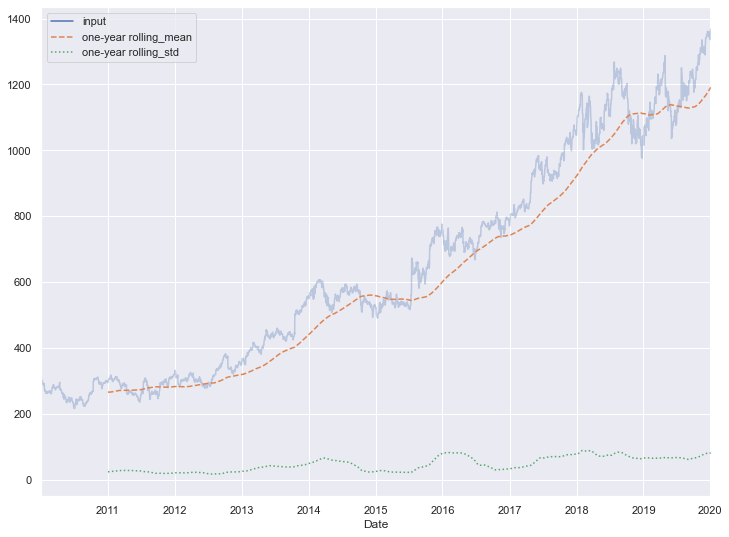

In [272]:
rolling = goog.rolling(365, center=False)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(12,9))
ax.lines[0].set_alpha(0.3)

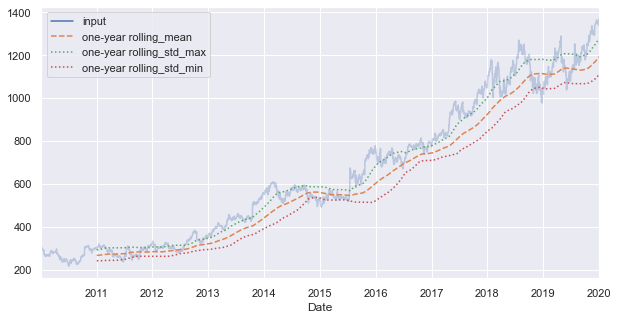

In [282]:
# Si queremos pintarlo como la media y a los lados las desviaciones típicas, podríamos hacer algo así:

rolling = goog.rolling(365)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std_max': rolling.mean() + rolling.std(),
                     'one-year rolling_std_min': rolling.mean() - rolling.std()})
ax = data.plot(style=['-', '--', ':', ':'], figsize=(10,5))
ax.lines[0].set_alpha(0.3)

In [278]:
rolling

Rolling [window=365,center=False,axis=0]

Al igual que con los groupby, los métodos ``aggregate()`` y ``apply()`` se pueden utilizar para cálculos continuos personalizados.

## Más información

En este notebook hemos visto algunas de las funcionalidades báiscas de las series temporales, pero puedes investigar mucho más en la sección ["Time Series/Date" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) de la documentación online de Pandas.